In [9]:
import numpy as np
import matplotlib.pyplot as plt

## 1 布局

◄ matplotlib.gridspec.GridSpec() 创建和配置复杂的子图网格布局，以便在一个图形窗口中放置多个子图
◄ matplotlib.gridspec.SubplotSpec 用于定义和控制子图在网格布局中的位置和大小
◄ matplotlib.pyplot.contour() 绘制等高线图
◄ matplotlib.pyplot.contourf() 绘制填充等高线图
◄ matplotlib.pyplot.figure() 创建一个新的图形窗口或图表对象，以便在其上进行绘图操作
◄ matplotlib.pyplot.rcParams 获取或设置全局绘图参数的默认值，如图形尺寸、字体大小、线条样式等
◄ matplotlib.pyplot.scatter() 绘制散点图
◄ matplotlib.pyplot.subplot() 用于在当前图形窗口中创建一个子图，并定位该子图在整个图形窗口中的位置
◄ matplotlib.pyplot.subplots() 一次性创建一个包含多个子图的图形窗口，并返回一个包含子图对象的元组
◄ numpy.linspace() 在指定的间隔内,返回固定步长的数据
◄ numpy.meshgrid() 产生网格化数据
◄ numpy.random.multivariate_normal() 用于生成多元正态分布的随机样本
◄ numpy.vstack() 返回竖直堆叠后的数组
◄ scipy.stats.gaussian_kde() 高斯核密度估计
◄ statsmodels.api.nonparametric.KDEUnivariate() 构造一元 KDE

### 1.1 使用subplots

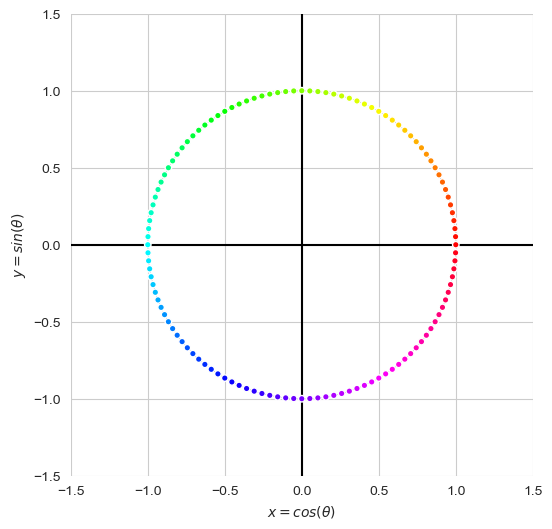

In [7]:
# 生成数据
theta_array = np.linspace(0, 2 * np.pi, 120, endpoint=False)
sin_y = np.sin(theta_array)
cos_y = np.cos(theta_array)
# 用hsv色谱产生一组渐变色，颜色种类和散点数相同
colors = plt.cm.hsv(np.linspace(0, 1, len(cos_y)))
# 设置图片大小
fig, ax = plt.subplots(figsize=(6, 6))
# 绘制正圆，横轴坐标为 cos，纵轴坐标为 sin
ax.plot(cos_y, sin_y,
        zorder=1, color='k', lw=0.25) # zorder = 1 指定了图形的层次顺序。zorder 值越大，图形就越靠前，即越置顶。
ax.scatter(cos_y, sin_y, marker='.', s=88,
           c=colors, edgecolor='w', zorder=2)
# s = 88 是散点的大小参数
ax.axhline(0, c='k', zorder=1)
ax.axvline(0, c='k', zorder=1)
ax.set_xlabel(r'$x = cos(\theta)$')
ax.set_ylabel(r'$y = sin(\theta)$')
# 设置横轴和纵轴范围
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.grid(True)
# 横纵轴采用相同的scale
ax.set_aspect('equal')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


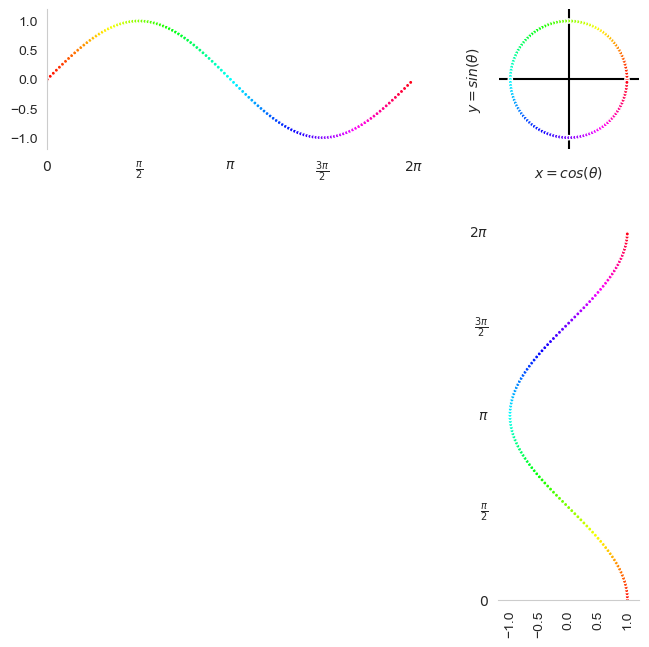

In [19]:
# 设置子图长宽比例
fig, axes = plt.subplots(2, 2, figsize=(8, 8),
                         gridspec_kw = {'width_ratios':[3,1],
                                        'height_ratios':[1,3]})
# gridspec_kw 用于指定子图的网格规格。通过'width_ratios':[3, 1]和'height_ratios':[1, 3]分别指定了列和行的宽高比。
# 刻度
radian_ticks = np.arange(0, 2*np.pi+np.pi/2, np.pi/2)
radian_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']
level_ticks = [-1, -0.5, 0, 0.5, 1]

# 关闭左下角图
axes[1,0].axis('off')

# 左上角子图：正弦曲线
axes[0,0].plot(theta_array, sin_y, color = 'k', lw = 0.25)
axes[0,0].scatter(theta_array, sin_y, marker = '.', s = 38, c=colors, edgecolor='w', zorder = 2)
# 图片美化
axes[0,0].set_xlim(0, 2 * np.pi)
axes[0,0].set_ylim(-1.2, 1.2)
axes[0,0].set_xticks(radian_ticks)
axes[0,0].set_xticklabels(radian_ticklabels)
axes[0,0].set_yticks(level_ticks)
axes[0,0].grid()
axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)
axes[0,0].spines['bottom'].set_visible(False)
axes[0,0].spines['left'].set_visible(True)
axes[0,0].set_aspect('equal', adjustable='box')

# 右上角子图：单位圆
axes[0,1].plot(cos_y, sin_y, color = 'k', lw = 0.25, zorder = 1)
axes[0,1].scatter(cos_y, sin_y, marker = '.', s = 38, c=colors, edgecolor='w', zorder = 2)
# 图片美化
axes[0,1].axhline(0, c = 'k', zorder = 1)
axes[0,1].axvline(0, c = 'k', zorder = 1)
axes[0,1].set_xlim(-1.2, 1.2)
axes[0,1].set_ylim(-1.2, 1.2)
axes[0,1].set_xticks(level_ticks)
axes[0,1].set_yticks(level_ticks)
axes[0,1].set_xticklabels([])
axes[0,1].set_yticklabels([])
axes[0,1].set_xlabel(r'$x = cos(\theta)$')
axes[0,1].set_ylabel(r'$y = sin(\theta)$')
axes[0,1].grid()
axes[0,1].set_aspect('equal', adjustable='box')
axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)
axes[0,1].spines['bottom'].set_visible(False)
axes[0,1].spines['left'].set_visible(False)

# 右下角子图：余弦曲线
axes[1,1].plot(cos_y, theta_array, color = 'k', lw = 0.25, zorder = 1)
axes[1,1].scatter(cos_y, theta_array, marker = '.', s = 38, c=colors, edgecolor='w', zorder = 2)
# 图片美化
axes[1,1].set_ylim(0, 2 * np.pi)
axes[1,1].set_xlim(-1.2, 1.2)
axes[1,1].set_xticks(level_ticks)
axes[1,1].set_yticks(radian_ticks)
axes[1,1].tick_params(axis='x', labelrotation=90)
axes[1,1].set_yticklabels(radian_ticklabels)
axes[1,1].grid()
axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)
axes[1,1].spines['bottom'].set_visible(True)
axes[1,1].spines['left'].set_visible(False)
axes[1,1].set_aspect('equal', adjustable='box')

## 2 装饰

◄ matplotlib.gridspec.GridSpec() 创建一个规则的子图网格布局
◄ matplotlib.pyplot.grid() 在当前图表中添加网格线
◄ matplotlib.pyplot.plot() 绘制折线图
◄ matplotlib.pyplot.subplot() 用于在一个图表中创建一个子图，并指定子图的位置或排列方式
◄ matplotlib.pyplot.subplots() 创建一个包含多个子图的图表，返回一个包含图表对象和子图对象的元组
◄ matplotlib.pyplot.title() 设置当前图表的标题，等价于 ax.set_title()
◄ matplotlib.pyplot.xlabel() 设置当前图表 x 轴的标签，等价于 ax.set_xlabel()
◄ matplotlib.pyplot.xlim() 设置当前图表 x 轴显示范围，等价于 ax.set_xlim()
◄ matplotlib.pyplot.xticks() 设置当前图表 x 轴刻度位置，等价于 ax.set_xticks()
◄ matplotlib.pyplot.ylabel() 设置当前图表 y 轴的标签，等价于 ax.set_ylabel()
◄ matplotlib.pyplot.ylim() 设置当前图表 y 轴显示范围，等价于 ax.set_ylim()
◄ matplotlib.pyplot.yticks() 设置当前图表 y 轴刻度位置，等价于 ax.set_yticks()
◄ numpy.arange() 创建一个具有指定范围、间隔和数据类型的等间隔数组
◄ numpy.exp() 计算给定数组中每个元素的 e 的指数值
◄ numpy.linspace() 用于在指定的范围内创建等间隔的一维数组，可以指定数组的长度
◄ numpy.sin() 用于计算给定弧度数组中每个元素的正弦值

## 3 色彩空间

◄ colorsys.hsv_to_rgb() 将 HSV (色相、饱和度、亮度) 颜色空间中的颜色值转换为 RGB (红、绿、蓝) 颜色空间中的颜色值
◄ matplotlib.pyplot.scatter() 绘制散点图
◄ numpy.append() 将给定的数组或值添加到另一个数组的末尾，返回一个新的数组，用于在 NumPy 中实现数组的扩展和拼接操作
◄ numpy.column_stack() 将两个矩阵按列合并
◄ numpy.copy() 创建给定数组的副本，返回一个新的数组，使得修改副本不会影响原始数组，用于实现在 NumPy 中进行数组的深拷贝
◄ numpy.empty() 创建指定形状 NumPy 空 (未初始化) 数组
◄ numpy.linspace() 在指定的间隔内,返回固定步长的数据
◄ numpy.meshgrid() 创建网格化数据
◄ numpy.ones_like() 用来生成和输入矩阵形状相同的全 1 矩阵
◄ numpy.vstack() 返回竖直堆叠后的数组
◄ numpy.zeros_like() 用来生成和输入矩阵形状相同的零矩阵

## 4 颜色映射

◄ matplotlib.pyplot.colormaps() 获取所有可用的颜色映射的名称列表
◄ matplotlib.pyplot.get_cmap() 获取指定名称的颜色映射对象，可用于将数据值映射到对应的颜色
◄ matplotlib.pyplot.cm.RdYlBu_r() 返回 RdYlBu 颜色映射的倒置版本
◄ seaborn.heatmap() 绘制热图
◄ enumerate() 用于在迭代过程中同时获取元素的索引和值，返回一个包含索引和值的元组的迭代器
◄ sympy.lambdify() 将 SymPy 表达式转换为可进行数值计算的 Python 函数
◄ sympy.diff() 对符号表达式进行求导，返回导数的表达式
◄ matplotlib.colors.rgb_to_hsv() 将 RGB 颜色表示转换为 HSV 颜色
◄ matplotlib.colors.LinearSegmentedColormap 创建自定义连续颜色映射
◄ matplotlib.colors.ListedColormap 创建自定义离散颜色映射